In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import fbprophet

In [7]:
#df = pd.read_csv('../../data/folkhalsomyndigheten_covid19.csv')
#df = pd.read_excel('../../data/Folkhalsomyndigheten_Covid19.xlsx')
df = pd.read_excel('../../data/iva_kumulativ.xlsx')

In [8]:
bag = df.loc[df.Region == 'Region Stockholm'].drop(columns='Region')
test = pd.DataFrame(columns=['ds', 'y'])
test['ds'] = bag.loc[10].index
test['y'] = bag.loc[10].values

In [11]:
#test = df[['Statistikdatum', 'Stockholm']].rename(columns={'Statistikdatum': 'ds', 'Stockholm': 'y'})

In [12]:
from fbprophet import Prophet
model = Prophet()

In [13]:
model.fit(test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


In [14]:
future_dates = model.make_future_dataframe(periods=10)

In [15]:
pred = model.predict(future_dates)

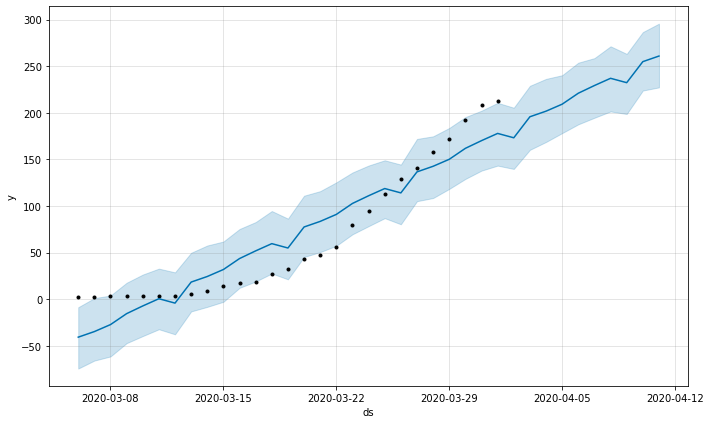

In [16]:
plot = model.plot(pred)
#plt.savefig('prophet_iva.png')

In [18]:
#model.plot_components(pred)

In [19]:
from fbprophet.diagnostics import cross_validation

In [44]:
future_dates.shape

(37, 1)

In [119]:
df_cv = cross_validation(model, initial='1 days', period='1 days', horizon='3 days')

INFO:fbprophet:Making 23 forecasts with cutoffs between 2020-03-07 00:00:00 and 2020-03-29 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observation

In [125]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-08,2.000000,2.000000,2.000000,4.0,2020-03-07
1,2020-03-09,2.000000,2.000000,2.000000,4.0,2020-03-07
2,2020-03-10,2.000000,2.000000,2.000000,4.0,2020-03-07
3,2020-03-09,-12.455204,-12.455204,-12.455204,4.0,2020-03-08
4,2020-03-10,49.124550,49.124550,49.124550,4.0,2020-03-08
...,...,...,...,...,...,...
64,2020-03-30,126.861874,101.664687,153.799027,192.0,2020-03-28
65,2020-03-31,132.527169,107.371985,156.732117,208.0,2020-03-28
66,2020-03-30,133.869816,105.904809,162.858762,192.0,2020-03-29
67,2020-03-31,139.530767,112.199247,167.499420,208.0,2020-03-29


In [120]:
from fbprophet.diagnostics import performance_metrics

In [121]:
df_pm = performance_metrics(df_cv)

In [122]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1397.875762,37.388177,28.383353,1.897364,0.408803,0.0
1,2 days,1547.048598,39.332539,30.714057,0.991684,0.458533,0.0
2,3 days,2038.691467,45.151871,36.233983,0.871972,0.509057,0.0


In [123]:
from fbprophet.plot import plot_cross_validation_metric

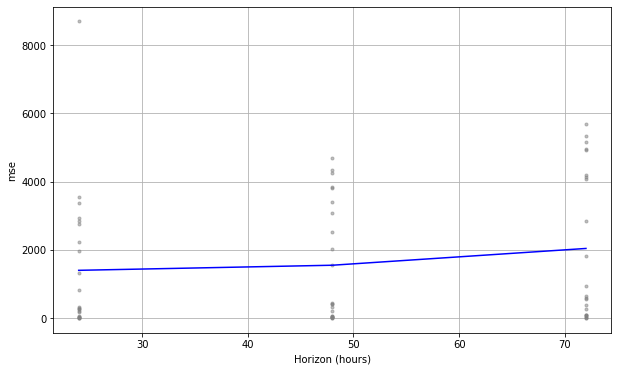

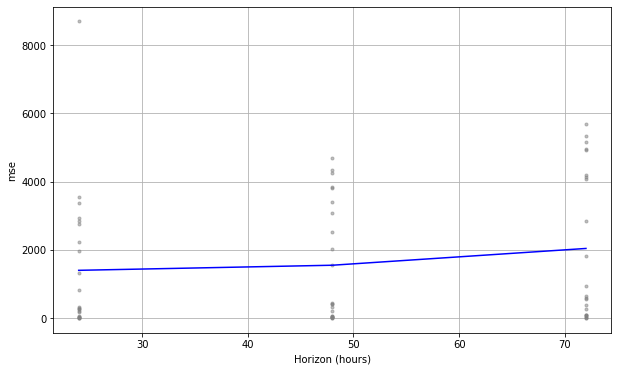

In [124]:
plot_cross_validation_metric(df_cv,metric='mse')